# Distribution of data into training, validation, and testing sets 
### - Training Set (e.g., 80%)
### - Validation Set (e.g., 10-20%)
### -Testing Set (e.g., 10-20%)

# Code For Brain Tumor Detection 

Found 2612 images belonging to 2 classes.
Found 652 images belonging to 2 classes.
Epoch 1/30
81/81 [==============================] - ETA: 0s - loss: 0.5565 - accuracy: 0.8516
Epoch 1: val_accuracy improved from -inf to 0.88906, saving model to brain_tumor_detector_logistic.h5
81/81 [==============================] - 8s 95ms/step - loss: 0.5565 - accuracy: 0.8516 - val_loss: 0.3812 - val_accuracy: 0.8891
Epoch 2/30
81/81 [==============================] - ETA: 0s - loss: 0.4962 - accuracy: 0.8632
Epoch 2: val_accuracy improved from 0.88906 to 0.92344, saving model to brain_tumor_detector_logistic.h5
81/81 [==============================] - 8s 93ms/step - loss: 0.4962 - accuracy: 0.8632 - val_loss: 0.2930 - val_accuracy: 0.9234
Epoch 3/30
81/81 [==============================] - ETA: 0s - loss: 0.3592 - accuracy: 0.8767
Epoch 3: val_accuracy did not improve from 0.92344
81/81 [==============================] - 8s 94ms/step - loss: 0.3592 - accuracy: 0.8767 - val_loss: 0.3397 - val_accu

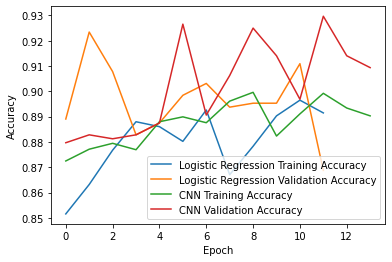

In [16]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Set the path to your dataset
dataset_path = "C:\\Users\\Aviral\\Downloads\\database"

# Define image dimensions and batch size
img_width, img_height = 128, 128
batch_size = 32

# Create data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Define the model architecture for logistic regression
logistic_model = Sequential()
logistic_model.add(Flatten(input_shape=(img_width, img_height, 3)))
logistic_model.add(Dense(1, activation='sigmoid'))

# Compile the logistic regression model
logistic_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up model checkpoints and early stopping for logistic regression
logistic_checkpoint = ModelCheckpoint('brain_tumor_detector_logistic.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
logistic_early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the logistic regression model
logistic_history = logistic_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[logistic_checkpoint, logistic_early_stopping]
)

# Evaluate the logistic regression model
logistic_model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)

# Define the model architecture for CNN
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the CNN model
cnn_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up model checkpoints and early stopping for CNN
cnn_checkpoint = ModelCheckpoint('brain_tumor_detector_cnn.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
cnn_early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the CNN model
cnn_history = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[cnn_checkpoint, cnn_early_stopping]
)

# Evaluate the CNN model
cnn_model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)

# Plot training history for logistic regression
plt.plot(logistic_history.history['accuracy'], label='Logistic Regression Training Accuracy')
plt.plot(logistic_history.history['val_accuracy'], label='Logistic Regression Validation Accuracy')

# Plot training history for CNN
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
